# Detection of type of lung disease based of the x-ray

In this Python notebook, we will build a machine learning model to predict and classify if a patient has a respiratory disorder. If the patient does have a respiratory disorder, we will classify it into either COVID-19 or pneumonia.

This notebook will cover the following steps:

1. Loading the data
2. Exploratory data analysis
3. Data preprocessing
4. Model training
5. Model evaluation
6. Model deployment

Let's get started!

## About the dataset:

In the kaggle dataset:

 X-ray samples of COVID-19 were retrieved from different sources due to the unavailability of a large specific dataset. Initially, a total of 1401 COVID-19 samples were collected from various repositories:

- [arXiv:2003.11597](https://arxiv.org/abs/2003.11597) \([GitHub repository by agchung](https://github.com/agchung))
- [Radiopaedia](https://radiopaedia.org/?lang=gb)
- [Italian Society of Radiology (SIRM)](https://www.sirm.org/en/category/articles/covid-19-database/)
- [Figshare COVID-19 Chest X-Ray Image Repository](https://figshare.com/articles/dataset/COVID-19_Chest_X-Ray_Image_Repository/12580328/2)
- [Figshare COVID-19 Image Repository](https://figshare.com/articles/COVID-19_Image_Repository/12275009/1)

Additionally, 912 augmented images were collected from Mendeley without using explicit data augmentation techniques \([Mendeley Dataset](https://data.mendeley.com/datasets/2fxz4px6d8/4)).

Finally, 2313 samples of normal and pneumonia cases were obtained from Kaggle:

- [Chest X-ray Pneumonia Dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
- [NIH Chest X-rays Dataset](https://www.kaggle.com/nih-chest-xrays/data)

**References:**
1. [arXiv:2003.11597](https://arxiv.org/abs/2003.11597)
2. [GitHub - agchung](https://github.com/agchung)
3. [Radiopaedia](https://radiopaedia.org/?lang=gb)
4. [SIRM - COVID-19 Database](https://www.sirm.org/en/category/articles/covid-19-database/)
5. [Figshare - COVID-19 Chest X-Ray Image Repository](https://figshare.com/articles/dataset/COVID-19_Chest_X-Ray_Image_Repository/12580328/2)
6. [Figshare - COVID-19 Image Repository](https://figshare.com/articles/COVID-19_Image_Repository/12275009/1)
7. [Mendeley Dataset](https://data.mendeley.com/datasets/2fxz4px6d8/4)
8. [Kaggle - Chest X-ray Pneumonia Dataset](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)
9. [Kaggle - NIH Chest X-rays Dataset](https://www.kaggle.com/nih-chest-xrays/data)

**Content:**
The dataset is organized into 3 folders (covid, pneumonia, normal), each containing chest X-ray posteroanterior (PA) images. In total, 6939 samples were used in the experiment, with 2313 samples for each case.


Link to the original dataset: [COVID19 Pneumonia Normal Chest Xray PA Database](https://www.kaggle.com/datasets/amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset)

Let's start with importing the dataset from kaggle.

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d amanullahasraf/covid19-pneumonia-normal-chest-xray-pa-dataset

 99% 1.89G/1.91G [00:13<00:00, 185MB/s]
100% 1.91G/1.91G [00:13<00:00, 153MB/s]


In [ ]:
!unzip -q /content/covid19-pneumonia-normal-chest-xray-pa-dataset.zip -d /content/xrays

replace /content/xrays/covid/001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/xrays/covid/001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


We have now imported our dataset from kaggle.


## Data Preparation and Visualization:

When we open the dataset directory, we can see that there are 3 subdirectories inside, "covid", "normal" and "pneumonia". Let's convert everything to a `.csv` for a more simplified view and ease of use.

In [ ]:
# Importing required modules
import os
import pandas as pd
import numpy as np
import seaborn as sns

Let's first save path to every class directory in a variable.

In [ ]:
covid_path = "/content/xrays/covid"
normal_path = "/content/xrays/normal"
pneumonia_path = "/content/xrays/pneumonia"

Now let's create a function to get filepaths and create a pandas dataframe


In [ ]:
def create_df(folder, class_name):
    filepaths = [os.path.join(folder, file) for file in os.listdir(folder)]
    data = {'filepaths': filepaths, 'class': [class_name] * len(filepaths), 'title': [os.path.basename(fp) for fp in filepaths]}
    return pd.DataFrame(data)

Let's call this for every data class and then concatenate them together.

In [ ]:
normal_df = create_df(normal_path, 'normal')
pneumonia_df = create_df(pneumonia_path, 'pneumonia')
covid_df = create_df(covid_path, 'covid')

Concatenate and save it.

In [ ]:
df = pd.concat([normal_df, pneumonia_df, covid_df], ignore_index=True)
df.to_csv('lung-xray.csv', index=False)

We can see that the data is quite inconsistent, some images are in `.jpg` while others are in `.png`, to maintain consistency, let's convert these to `.jpg`. We'll be using the `.convert()` function from [PIL (Pillow) module](https://pillow.readthedocs.io/en/stable/).

In [ ]:
from PIL import Image
import os

def img_to_jpg(input_folder, output_folder, target_size=(1024, 1024)):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file in os.listdir(input_folder):
        input_filepath = os.path.join(input_folder, file)
        output_filepath = os.path.join(output_folder, file)

        try:
            with Image.open(input_filepath) as img:
                # Convert the image to 'RGB'
                img = img.convert('RGB')

                # Resize the image to the target size
                img = img.resize(target_size)

                # Check if the format is already 'JPEG'
                if img.format != "JPEG":
                    # Convert the image to the target format and save to the output folder
                    img.save(os.path.join(output_folder, os.path.splitext(file)[0] + '.jpg'))
        except Exception as e:
            print(f"Error converting {file}: {e}")

Calling the function for every class.

In [ ]:
to_jpg_xrays = "content/jpeg-xrays/"
img_to_jpg(normal_path, f"{to_jpg_xrays}/normal" )
img_to_jpg(pneumonia_path, f"{to_jpg_xrays}/pneumonia")
img_to_jpg(covid_path, f"{to_jpg_xrays}/covid")

In [ ]:
!cp -a  "/content/drive/MyDrive/Colab Notebooks/lung-xray2" "/content/jpeg-xrays"

Now that the images are all in one file format, let's modify the csv to point to these new images and also change the path variables.

In [ ]:
covid_path = "/content/jpeg-xrays//covid"
normal_path = "/content/jpeg-xrays/normal"
pneumonia_path = "/content/jpeg-xrays/pneumonia"


normal_df = create_df(normal_path, 'normal')
pneumonia_df = create_df(pneumonia_path, 'pneumonia')
covid_df = create_df(covid_path, 'covid')

df = pd.concat([normal_df, pneumonia_df, covid_df], ignore_index=True)
df.to_csv('lung-xray2.csv', index=False)
df.head()

,filepaths,class,title
0,/content/jpeg-xrays/normal/00000652_001.jpg,normal,00000652_001.jpg
1,/content/jpeg-xrays/normal/00000500_002.jpg,normal,00000500_002.jpg
2,/content/jpeg-xrays/normal/00001326_005.jpg,normal,00001326_005.jpg
3,/content/jpeg-xrays/normal/00001148_001.jpg,normal,00001148_001.jpg
4,/content/jpeg-xrays/normal/00001230_005.jpg,normal,00001230_005.jpg


Let's start visualizing our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filepaths  6905 non-null   object
 1   class      6905 non-null   object
 2   title      6905 non-null   object
dtypes: object(3)
memory usage: 162.0+ KB


We can see that there are 6905 entries in our dataframe and the dataframe consists of 3 features, each of object type.


In [ ]:
df["class"].value_counts()

normal       2313
pneumonia    2313
covid        2279
Name: class, dtype: int64

<Axes: >

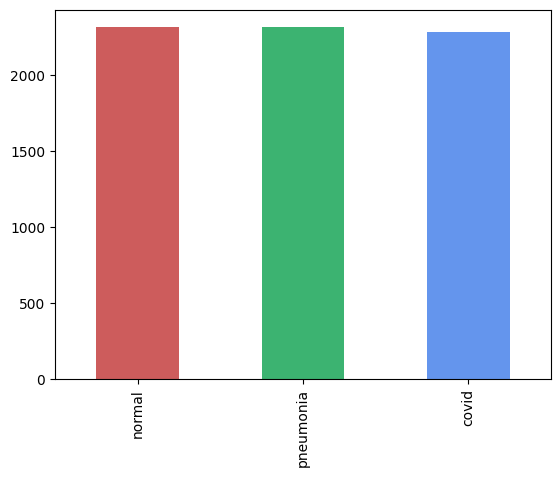

In [ ]:
df["class"].value_counts().plot(kind="bar", color=["indianred", "mediumseagreen", "cornflowerblue"])

There are 2313 images in each of the classes except covid which only has 2279 images.

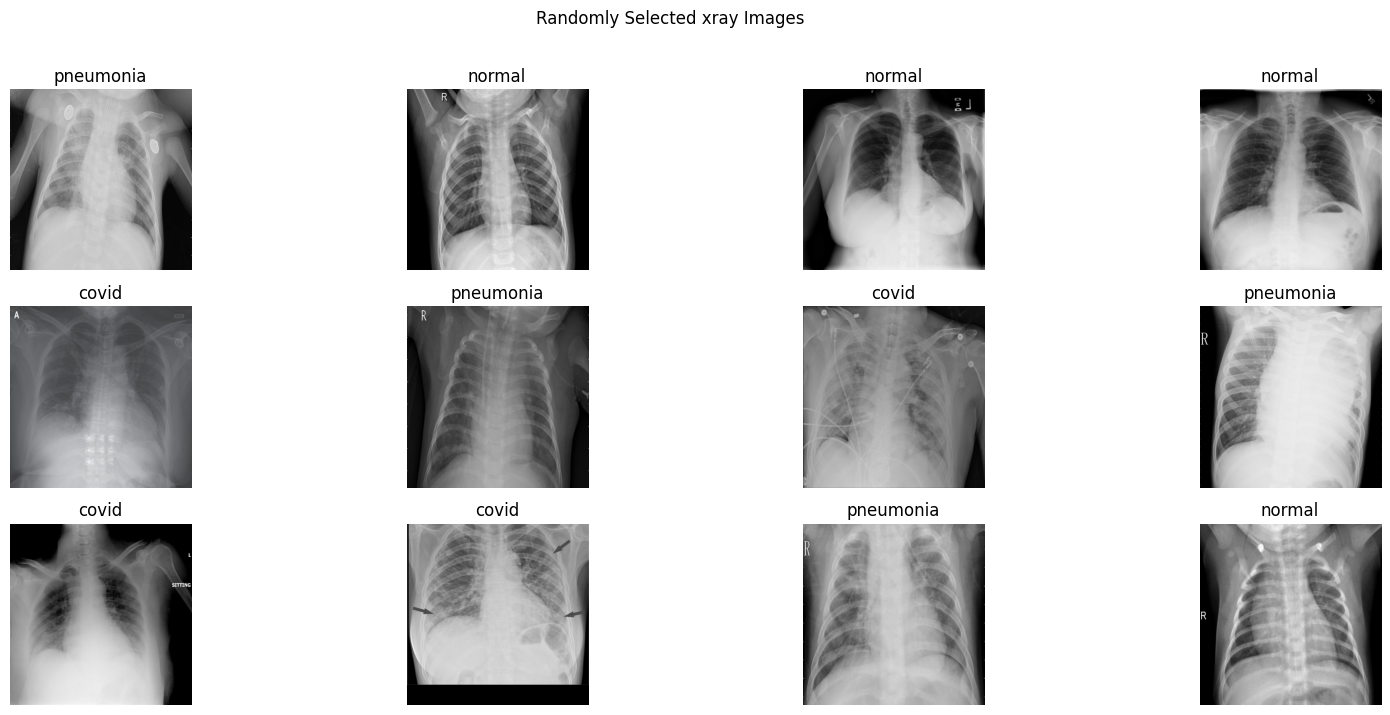

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Select ten random indices
random_indices = random.sample(range(len(df)), 12)

# Visualize ten random bird images
fig, axes = plt.subplots(3, 4, figsize=(20, 8))
fig.subplots_adjust(wspace=0.1)
plt.suptitle("Randomly Selected xray Images")

for i, idx in enumerate(random_indices):
    sample_image_path = df['filepaths'].iloc[idx]
    sample_image = Image.open(f"{sample_image_path}")

    axes[i // 4, i % 4].imshow(sample_image)
    axes[i // 4, i % 4].set_title(f'{df["class"].iloc[idx]}')
    axes[i // 4, i % 4].axis('off')

plt.show()



These are random xrays from our dataset.

In [ ]:
from sklearn.model_selection import train_test_split


# Split the data into 70% train and 30% temp (which will be further split into 15% test and 15%
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

# Split the remaining 30% into 50% test and 50% validation while preserving label distribution
test_df, val_df = train_test_split(temp_df, test_size=0.5, random_state=42, stratify=temp_df['class'])

We split our dataset into 80-20 ratio for training and testing, we then split the testing part into testing and validation halves.


In [ ]:
train_df


,filepaths,class,title
2244,/content/jpeg-xrays/normal/NORMAL2-IM-0818-000...,normal,NORMAL2-IM-0818-0001-0002.jpg
4464,/content/jpeg-xrays/pneumonia/person1409_virus...,pneumonia,person1409_virus_2413.jpg
2775,/content/jpeg-xrays/pneumonia/person374_bacter...,pneumonia,person374_bacteria_1712.jpg
2889,/content/jpeg-xrays/pneumonia/person1415_virus...,pneumonia,person1415_virus_2425.jpg
4624,/content/jpeg-xrays/pneumonia/person124_virus_...,pneumonia,person124_virus_244.jpg
...,...,...,...
5855,/content/jpeg-xrays//covid/301.jpg,covid,301.jpg
449,/content/jpeg-xrays/normal/00000974_002.jpg,normal,00000974_002.jpg
6542,/content/jpeg-xrays//covid/8fc103ca.jpg,covid,8fc103ca.jpg
2255,/content/jpeg-xrays/normal/00001256_003.jpg,normal,00001256_003.jpg


In [ ]:
test_df

,filepaths,class,title
1603,/content/jpeg-xrays/normal/00000155_001.jpg,normal,00000155_001.jpg
601,/content/jpeg-xrays/normal/00001055_004.jpg,normal,00001055_004.jpg
2242,/content/jpeg-xrays/normal/IM-0409-0001.jpg,normal,IM-0409-0001.jpg
1343,/content/jpeg-xrays/normal/00000149_008.jpg,normal,00000149_008.jpg
365,/content/jpeg-xrays/normal/NORMAL2-IM-0765-000...,normal,NORMAL2-IM-0765-0001.jpg
...,...,...,...
3887,/content/jpeg-xrays/pneumonia/person381_bacter...,pneumonia,person381_bacteria_1731.jpg
5937,/content/jpeg-xrays//covid/COVID19(373).jpg,covid,COVID19(373).jpg
4127,/content/jpeg-xrays/pneumonia/person1770_bacte...,pneumonia,person1770_bacteria_4614.jpg
2175,/content/jpeg-xrays/normal/00001157_003.jpg,normal,00001157_003.jpg


In [ ]:
val_df


,filepaths,class,title
4056,/content/jpeg-xrays/pneumonia/person272_virus_...,pneumonia,person272_virus_559.jpg
515,/content/jpeg-xrays/normal/00000163_000.jpg,normal,00000163_000.jpg
2687,/content/jpeg-xrays/pneumonia/person434_bacter...,pneumonia,person434_bacteria_1877.jpg
421,/content/jpeg-xrays/normal/00000624_004.jpg,normal,00000624_004.jpg
637,/content/jpeg-xrays/normal/00001033_000.jpg,normal,00001033_000.jpg
...,...,...,...
4257,/content/jpeg-xrays/pneumonia/person423_bacter...,pneumonia,person423_bacteria_1857.jpg
265,/content/jpeg-xrays/normal/00000911_000.jpg,normal,00000911_000.jpg
424,/content/jpeg-xrays/normal/00000340_000.jpg,normal,00000340_000.jpg
651,/content/jpeg-xrays/normal/00000922_000.jpg,normal,00000922_000.jpg


In [ ]:
import shutil

def move_images(df, src, dest_base):
    for index, row in df.iterrows():
        img_path = os.path.join(src, row['filepaths'])
        label_folder = row['class']
        dest_path = os.path.join(dest_base, label_folder)
        dest_file_path = os.path.join(dest_path, row['filepaths'].split('/')[-1])

        if not os.path.exists(dest_path):
            os.makedirs(dest_path)

        shutil.copy(img_path, dest_file_path)

# Move resized images to the 'train' folder
move_images(train_df, "/content/lung-xray", "/content/dataset/train")

# Move resized images to the 'test' folder
move_images(test_df, "/content/lung-xray", "/content/dataset/test")

# Move resized images to the 'valid' folder
move_images(val_df, "/content/lung-xray", "/content/dataset/valid")

Moving the images into train, valid and test folders to properly segregate them.

In [ ]:
test_dir = "/content/dataset/test"
train_dir = "/content/dataset/train"
val_dir = "/content/dataset/valid"

## Model architecture


Importing necessary libraries for the training and building our model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, GlobalAveragePooling2D, Input, Reshape, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from math import floor
from datetime import datetime
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import gc


Making image datagenerators to save memory and generate different images on the fly. The training data generator uses augmentations likes rotation range, rescale and fill mode which will help generalize our model to different types of images.

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    fill_mode='nearest'
)
general_gen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
test_generator = general_gen.flow_from_directory(
    directory = test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode = "categorical",
    shuffle=False,
    seed = 42
)

train_generator = train_gen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 16,
    class_mode = "categorical",
    shuffle = True,
    seed = 42
)

valid_generator = general_gen.flow_from_directory(
    directory = val_dir,
    target_size = (224, 224),
    color_mode = "rgb",
    batch_size = 16,
    class_mode = "categorical",
    shuffle = True,
    seed = 42
)

Found 690 images belonging to 3 classes.
Found 5524 images belonging to 3 classes.
Found 691 images belonging to 3 classes.


We use these generators to generate images, we use the augmentations for only the train generator because we do not need the augmentations in testing set.

In [ ]:
class_to_label_map = {'pneumonia' : 2, 'covid' : 1, 'normal' : 0}


we map each class to a numeric index.

### Model building and training

In [ ]:
EPOCHS = 30
INIT_LR = 2e-4
T_BS = 32
V_BS = 32
decay_rate = 0.95
decay_step = 1
learning_rate = 1e-4

# defining how learning rate will decay over time
def scheduler(epoch, lr):
    if epoch < 5:
        return INIT_LR
    else:
        global learning_rate
        learning_rate *= decay_rate
        print('learning_rate:', learning_rate)
        return learning_rate

callback3 = LearningRateScheduler(scheduler)

log_dir = "./logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  # saving logs to the /logs directory
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Callbacks include saving model checkpoints, learning rate schedule and tensorboard_callback
callbacks = [ModelCheckpoint(filepath='best_lstm_model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=True),
             callback3, tensorboard_callback]

Defining different model parameters.

In [ ]:
from time import time

In [ ]:
df_x = df["filepaths"]
df_y = df["class"]

We'll be choosing a vgg19 as our base model and using transfer learning train it for our specific dataset.

In [ ]:
def get_model():
    input_layer = Input(shape=(224, 224, 3))
    baseModel = VGG19(weights="imagenet", include_top=False, input_tensor=input_layer)

    for layer in baseModel.layers:
        layer.trainable = False

    x = baseModel.output
    x = Reshape((49, 512))(x)
    x = LSTM(512, activation="relu", return_sequences=True, trainable=False)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Flatten(name="flatten")(x)
    x = Dense(4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=output)

    # Compile the model
    opt = RMSprop(clipvalue=100)
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

    return model


In [ ]:
submission_predictions = []

# CREATE MODEL
model = get_model()

80134624/80134624 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

We can see that we have 141,716,547 total parameters which include 119,575,555 Trainable parameters and 22,140,992 non-trainable parameters.

In [ ]:
# Load Model Weights
start_train = time()

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = valid_generator,
    validation_steps = valid_generator.n // valid_generator.batch_size,
    epochs = EPOCHS,
    callbacks = callbacks
)

print()
print(time() - start_train)

Epoch 1/30
345/345 [==============================] - ETA: 0s - loss: 1.0174 - accuracy: 0.8063
Epoch 1: val_loss improved from inf to 0.87002, saving model to best_lstm_model.keras
345/345 [==============================] - 109s 286ms/step - loss: 1.0174 - accuracy: 0.8063 - val_loss: 0.8700 - val_accuracy: 0.7762 - lr: 2.0000e-04
Epoch 2/30
345/345 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.8410
Epoch 2: val_loss improved from 0.87002 to 0.44747, saving model to best_lstm_model.keras
345/345 [==============================] - 100s 289ms/step - loss: 0.6949 - accuracy: 0.8410 - val_loss: 0.4475 - val_accuracy: 0.8939 - lr: 2.0000e-04
Epoch 3/30
345/345 [==============================] - ETA: 0s - loss: 0.5174 - accuracy: 0.8655
Epoch 3: val_loss improved from 0.44747 to 0.31829, saving model to best_lstm_model.keras
345/345 [==============================] - 98s 282ms/step - loss: 0.5174 - accuracy: 0.8655 - val_loss: 0.3183 - val_accuracy: 0.9259 - lr: 2.

We can see that our model has about 95.2% accuracy and 0.17 loss, which is pretty good.

In [ ]:
model.save('best_lstm_model.keras')

## Model Evaluation

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_csv_file = 'history.csv'

test_generator.reset()
start_test = time()

print()
predY = model.predict(
    test_generator,
    steps = test_generator.n // test_generator.batch_size,
    verbose = 1
)

testY = test_generator.classes

print()
print(time() - start_test)


690/690 [==============================] - 13s 16ms/step

13.080049514770508


Testing 690 images took ~13s to complete.

Let's try plotting the confusion matrix for our model.

In [ ]:
confusion_matrix_result = confusion_matrix(testY, np.argmax(predY, axis=-1))
confusion_matrix_result

array([[224,   4,   0],
       [  6, 221,   4],
       [  4,  16, 211]])

690/690 [==============================] - 11s 16ms/step


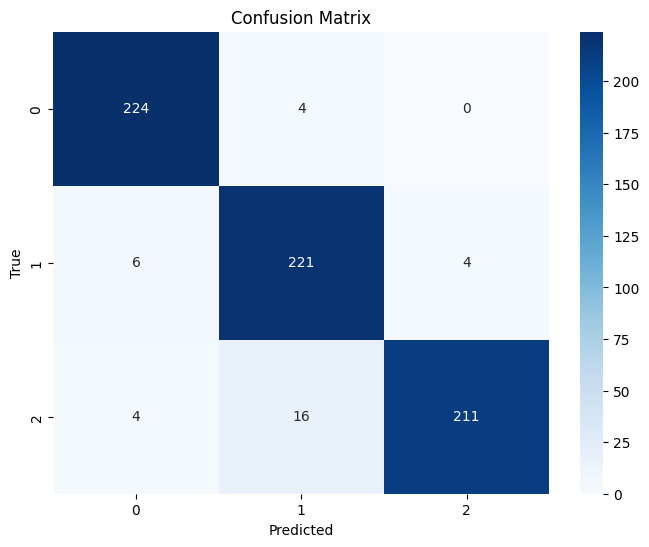

In [ ]:
predY = model.predict(
        test_generator,
        steps = test_generator.n // test_generator.batch_size,
        verbose = 1
    )

test = test_generator.classes
confusion_matrix_result = confusion_matrix(testY, np.argmax(predY, axis=-1))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

We can see that the predicted values and actual values are very close to each other thus we can conclude the model's predictions are very accurate.

Let's try looking at the f1 score, support, recall and precision for each of the classes.


**Precision:** Indicates the proportion of correctly identified instances among the total predicted instances for a class.

**Recall:** Indicates the proportion of correctly identified instances among the total actual instances for a class.

**F1-score:** The harmonic mean of precision and recall, providing a balance between them.

**Support:** Number of actual occurrences of the class in the specified dataset.

**Accuracy:** Overall accuracy of the model on the dataset.

In [ ]:
classification_report_result = classification_report(testY, np.argmax(predY, axis=-1), target_names=class_to_label_map, output_dict=True, digits=4)

classification_report_result

{'pneumonia': {'precision': 0.9572649572649573,
  'recall': 0.9824561403508771,
  'f1-score': 0.9696969696969696,
  'support': 228},
 'covid': {'precision': 0.91701244813278,
  'recall': 0.9567099567099567,
  'f1-score': 0.9364406779661018,
  'support': 231},
 'normal': {'precision': 0.9813953488372092,
  'recall': 0.9134199134199135,
  'f1-score': 0.946188340807175,
  'support': 231},
 'accuracy': 0.9507246376811594,
 'macro avg': {'precision': 0.9518909180783156,
  'recall': 0.9508620034935825,
  'f1-score': 0.9507753294900821,
  'support': 690},
 'weighted avg': {'precision': 0.9518675526905477,
  'recall': 0.9507246376811594,
  'f1-score': 0.9506930614891825,
  'support': 690}}

|            | precision | recall | f1-score | support |
|------------|-----------|--------|----------|---------|
| pneumonia  |   0.96    |  0.98  |   0.97   |   228   |
| covid      |   0.92    |  0.96  |   0.94   |   231   |
| normal     |   0.98    |  0.91  |   0.95   |   231   |
|------------|-----------|--------|----------|---------|  
| micro avg  |   0.95    |  0.95  |   0.95   |   690   |
| macro avg  |   0.95    |  0.95  |   0.95   |   690   |
| weighted avg | 0.95    |  0.95  |   0.95   |   690   |

Which display a high level of accuracy



Saving the confusion matrix and classification report to a csv file for future uses.

In [ ]:
cm_df = pd.DataFrame(confusion_matrix_result)
cr_df = pd.DataFrame(classification_report_result)


In [ ]:
with open(hist_csv_file, mode='a') as f:
    hist_df.to_csv(f)
    cm_df.to_csv(f)
    cr_df.to_csv(f)

In [ ]:
model = keras.models.load_model('/content/best_lstm_model.keras')


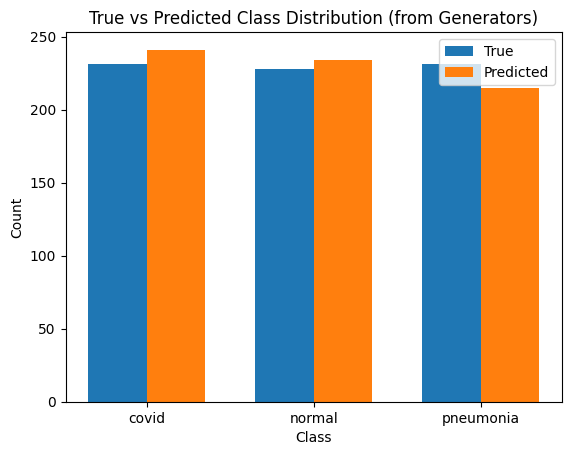

In [ ]:
class_labels = ['normal', 'covid', 'pneumonia']

# Convert generator classes to a flat list
true_labels_gen = [class_labels[idx] for idx in test_generator.classes]
pred_labels_gen = [class_labels[np.argmax(pred)] for pred in predY]

# DataFrame for easier manipulation
df_comparison_gen = pd.DataFrame({'True': true_labels_gen, 'Predicted': pred_labels_gen})

# Count the occurrences of each class in both true and predicted labels
true_counts_gen = df_comparison_gen['True'].value_counts().sort_index()
pred_counts_gen = df_comparison_gen['Predicted'].value_counts().sort_index()

# Plot bar chart
width = 0.35
x_gen = range(len(true_counts_gen))

fig_gen, ax_gen = plt.subplots()
rects1_gen = ax_gen.bar(x_gen, true_counts_gen, width, label='True')
rects2_gen = ax_gen.bar([i + width for i in x_gen], pred_counts_gen, width, label='Predicted')

ax_gen.set_xticks([i + width/2 for i in x_gen])
ax_gen.set_xticklabels(true_counts_gen.index)
ax_gen.legend()

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('True vs Predicted Class Distribution (from Generators)')
plt.show()


This tells us that the model predicted some of the xrays with pneumonia as either normal or with covid, the number isn't as significant when we look at the count of correct predictions though.

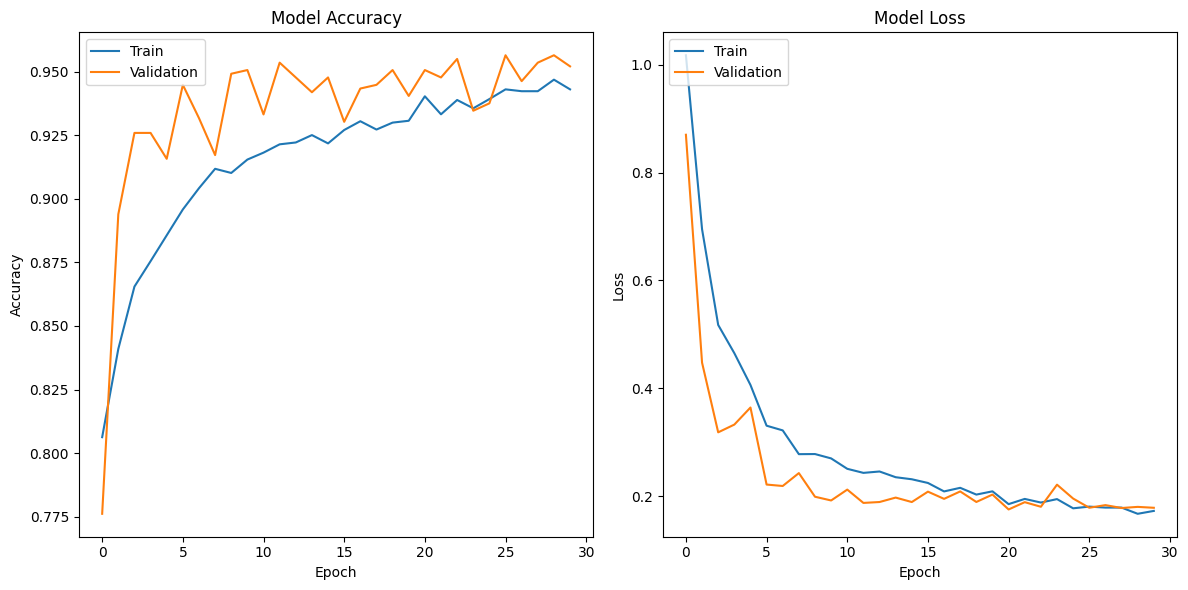

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(hist_df['accuracy'])
plt.plot(hist_df['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(hist_df['loss'])
plt.plot(hist_df['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


We can see that our model had noisy learning curves especially for validation set, it might be because of the fewer number of datapoints. Also, we can see that the model had an initial accuracy of about 83% which gradually increased to 95%. We can also see that the rate of increase of accuracy has slowed down quite a bit towards the end of the training phase.

The graph of loss shows a fast decrease in the start and then it kinda plauteas after 20 epochs. Validation loss does look noisy still, but is on average closer to the training loss.  

# Conclusion

From this notebook, we have successfully made a model that can predict and classify between xrays of people having either covid, pneumonia or healthy lungs. Our model performed very well in various different scenarios and has shown very good accuracy at classifying the xrays.